In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.optimize as opt;

In [2]:
def electron_E(temp):
    A_0 = 1.20173e6 #A•m^-2•K^-2
    k = 1.380649e-23 #J/K
    lam_0 = 0.5
    A_g = lam_0 * A_0 #A•m^-2•K^-2
    T = temp + 273.5 # Kelvin
    W = 7.2098e-19 # Joules
    J = A_g*(T**(2))*np.exp(-W/(k*T))
    return J 

# Finds the number of electrons generated
# J is the current density
def electron_num(J):
    electrons = 6.241509e18 #electron/second
    return J*electrons

# finds the heat generated at a specific current for a period of time
# returns the energy in terms of Joules
# I is the current through the material
# R is the resistence
# t is the time
def heat_generation(I, R, t):
    p = (I**2)*R
    Q = p*t
    return Q

# finds the specific heat of the material
# returns the heat per mass at a temperature
# m is the mass of material
# c is the specific heat capacifty of material
# T1 is the initial temperature
# T2 is the final Temperature
def specific_heat(m, c, T1, T2):
    return m*c*(T2-T1)

# converts the heat levels to a temperature
# returns temperature in K
# m is the mass of material
# c is the specific heat capacifty of material
# T1 is the initial temperature
# Q is the specific heat
def heat_temp_conversion(m, c, T1, Q):
    return (Q/(m*c))+(T1)

In [3]:
print(heat_generation(24, 0.1, 10), "J")

576.0 J


In [4]:
# specific heat capacifty of tungsten is 0.134 J/g m K

print(specific_heat(0.01, 0.134*1000, 23, 100), "J/(kg K)")


print(heat_temp_conversion(0.01, 0.134*1000, 23, heat_generation(24, 0.1, 25)), "C")

103.18 J/(kg K)
1097.6268656716418 C


In [5]:
print(electron_E(1000), "A•m^-2")

1.514811560996606e-06 A•m^-2


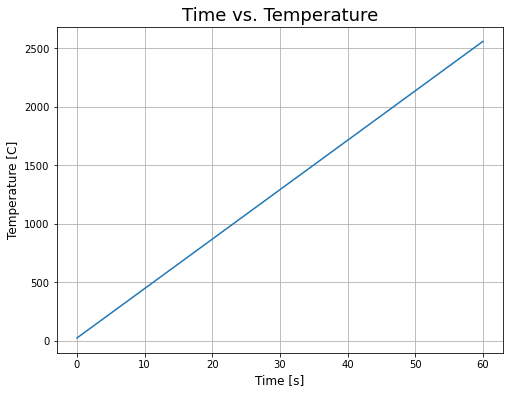

In [6]:
heat_time = []
for i in range(0, 60):
    heat_time.append(heat_temp_conversion(0.01, 0.134*1000, 23, heat_generation(24, 0.1, i)))

time = np.linspace(0,60,60)
plt.figure(figsize=(8,6))
plt.plot(time, heat_time)
plt.xlabel("Time [s]", size=12)
plt.ylabel("Temperature [C]", size=12)
plt.title("Time vs. Temperature", size=18)
plt.grid()
plt.show()

15


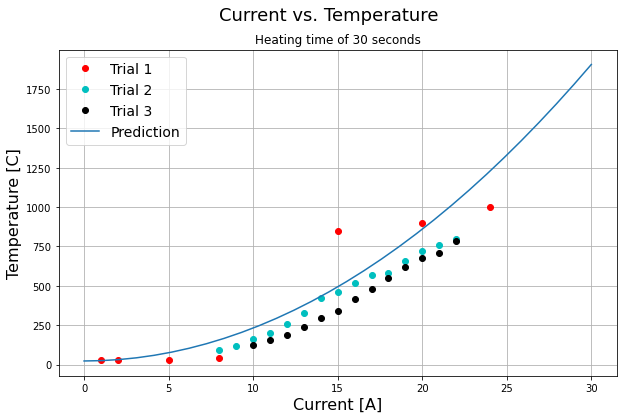

In [7]:
data_Current = [1, 2, 5, 8, 15, 20, 24]
data_temp = [27, 27, 28, 43, 850, 900, 1000]

data_Current2 = np.linspace(8, 22, 22-7)
print(len(data_Current2))
data_temp2 = [90, 120, 160, 200, 260, 330, 420, 460,
              520, 570, 580, 660, 720, 760, 800]

data_Current3 = np.linspace(10, 22, 22-9)
data_temp3 = [125, 156, 190, 236, 295, 338, 
              417, 480, 550, 620, 680, 710, 786]

heat_current = []
current = np.linspace(0,30,30)

for i in range(0, 30):
    heat_current.append(heat_temp_conversion(0.01, 0.134*1000, 23, heat_generation(i, 0.1, 30)))  
    
plt.figure(figsize=(10,6))
plt.plot(data_Current, data_temp, "ro", label="Trial 1")
plt.plot(data_Current2, data_temp2, "co", label="Trial 2")
plt.plot(data_Current3, data_temp3, "ko", label="Trial 3")
plt.plot(current, heat_current, label="Prediction")
plt.xlabel("Current [A]", size=16)
plt.ylabel("Temperature [C]", size=16)
plt.suptitle("Current vs. Temperature", size=18)
plt.title("Heating time of 30 seconds")
plt.grid()
plt.legend(fontsize=14)
plt.show()

## 1 Ampere is equal to 1 Coulomb per second, so 1 coulomb is equal to 6.241509x10^18 e per second. so we can convert to find number of electrons per second meter

In [8]:
print(electron_num(electron_E(1000)), "e•s^-1•m^-2")

9454709991264.365 e•s^-1•m^-2


In [9]:
electron_number_array = []
for i in range(0, 1200):
    electron_number_array.append(electron_num(electron_E(i)))

In [10]:
temp = np.linspace(0,1200, 1200)

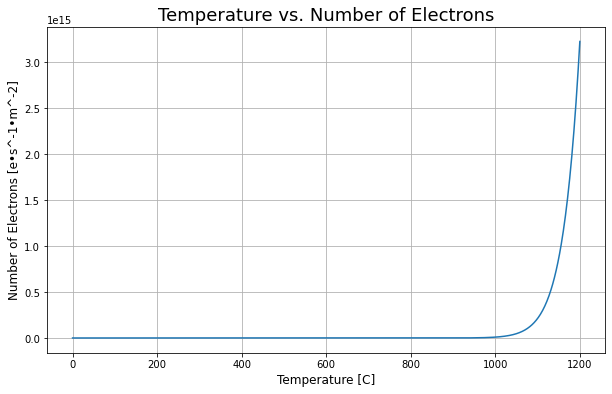

In [11]:
plt.figure(figsize=(10,6))
plt.plot(temp, electron_number_array)
plt.xlabel("Temperature [C]", size=12)
plt.ylabel("Number of Electrons [e•s^-1•m^-2]", size=12)
plt.title("Temperature vs. Number of Electrons", size=18)
plt.grid()
plt.show()

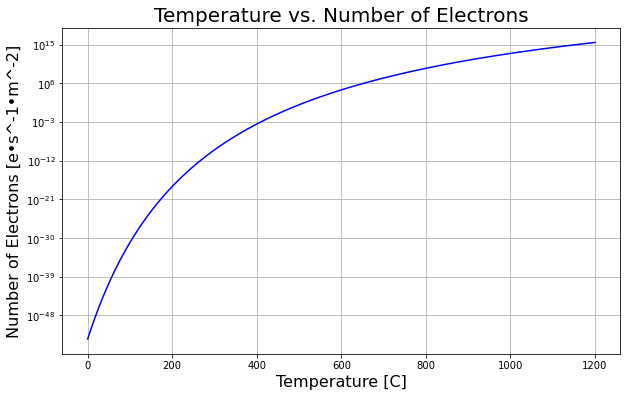

In [12]:

plt.figure(figsize=(10,6))
#plt.plot(temp, electron_number_array)

plt.semilogy(temp, electron_number_array, "b")
plt.xlabel("Temperature [C]", size=16)
plt.ylabel("Number of Electrons [e•s^-1•m^-2]", size=16)
plt.title("Temperature vs. Number of Electrons", size=20)
plt.grid()
plt.show()


In [13]:
electron_number_array

[3.3614439235052334e-54,
 6.788560788050182e-54,
 1.3640335519498082e-53,
 2.7270416638174956e-53,
 5.4250207637307935e-53,
 1.0739328903324732e-52,
 2.1156404050083876e-52,
 4.1478025182790825e-52,
 8.09334430020252e-52,
 1.571786636974234e-51,
 3.038340159044869e-51,
 5.846254444991751e-51,
 1.119795049927612e-50,
 2.1352050376605505e-50,
 4.0532300366527216e-50,
 7.660262891721661e-50,
 1.4414072559100134e-49,
 2.7005356836342275e-49,
 5.037935861235174e-49,
 9.358664805311357e-49,
 1.7312208880516017e-48,
 3.189238067047846e-48,
 5.85107334427778e-48,
 1.0690950721659997e-47,
 1.9455710238655165e-47,
 3.5265121353761773e-47,
 6.366907320336843e-47,
 1.1450214340903738e-46,
 2.0512448884052068e-46,
 3.6606386049974604e-46,
 6.508007871657207e-46,
 1.1526762920253704e-45,
 2.033998947222165e-45,
 3.5759706425078324e-45,
 6.264012339216693e-45,
 1.0933068833995932e-44,
 1.9014178160755829e-44,
 3.2951411235170105e-44,
 5.690445343140668e-44,
 9.792844851049084e-44,
 1.6794856209791957

In [14]:
area = 2*np.pi*(1.2)*(10)
for i in range(0,len(electron_number_array)):
        electron_number_array[i] = (electron_number_array[i]/1000000)*area

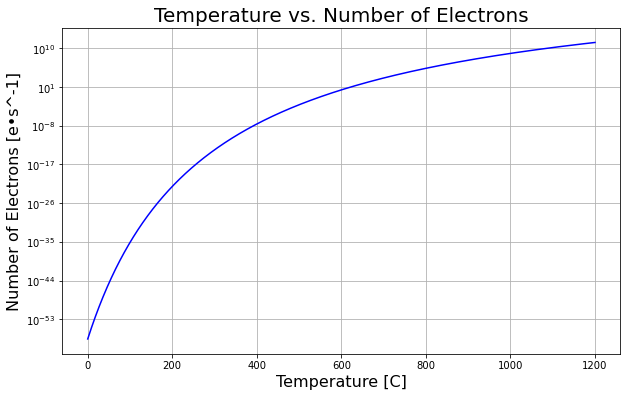

In [15]:
plt.figure(figsize=(10,6))
#plt.plot(temp, electron_number_array)

plt.semilogy(temp, electron_number_array, "b")
plt.xlabel("Temperature [C]", size=16)
plt.ylabel("Number of Electrons [e•s^-1]", size=16)
plt.title("Temperature vs. Number of Electrons", size=20)
plt.grid()
plt.show()

In [16]:
3.3614439235052334e-54<1

True

In [17]:
for i in range(0,len(electron_number_array)):
        electron_number_array[i] = electron_number_array[i]*1000000

In [18]:
for i in range(0,len(electron_number_array)):
    if(electron_number_array[i]<1):
        electron_number_array[i] = 0

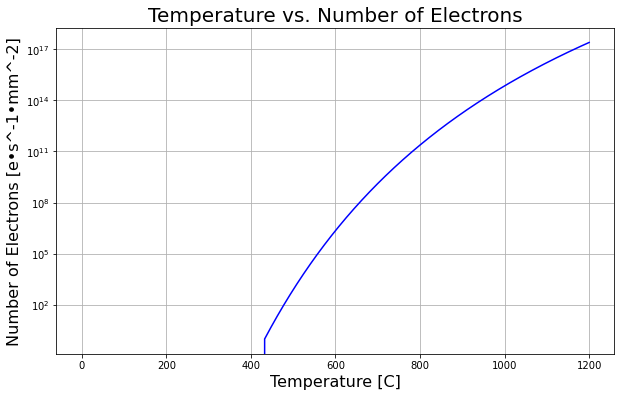

In [19]:
plt.figure(figsize=(10,6))
#plt.plot(temp, electron_number_array)

plt.semilogy(temp, electron_number_array, "b")
plt.xlabel("Temperature [C]", size=16)
plt.ylabel("Number of Electrons [e•s^-1•mm^-2]", size=16)
plt.title("Temperature vs. Number of Electrons", size=20)
plt.grid()
plt.show()

In [20]:
electron_number_array/1000000


TypeError: unsupported operand type(s) for /: 'list' and 'int'

In [ ]:
print(2*np.pi*(1.2)*(10), "mm^2")

In [ ]:
area = 2*np.pi*(1.2)*(10)
for i in range(0,len(electron_number_array)):
        electron_number_array[i] = electron_number_array[i]*area

In [ ]:
plt.figure(figsize=(10,6))
#plt.plot(temp, electron_number_array)

plt.semilogy(temp, electron_number_array, "b")
plt.xlabel("Temperature [C]", size=16)
plt.ylabel("Number of Electrons [e•s^-1]", size=16)
plt.title("Temperature vs. Number of Electrons", size=20)
plt.grid()
plt.show()

In [ ]:
for i in range(0,len(electron_number_array)):
    if(electron_number_array[i]>1):
        print(electron_number_array[i], temp[i])
        break

In [ ]:
print(electron_E(2000),"J")

In [ ]:
print(electron_num(electron_E(2000)), "e•s^-1•m^-2")

In [ ]:
#approximate guess for the surface area of a tungsten coil 3.045×10^−5 m^2
print(electron_num(electron_E(2000))*(3.045*10**(-5)), "e•s^-1")

In [ ]:
time_projection = np.linspace(0,500,500)
projection_data = np.zeros(len(time_projection))
#print(len(time_projection), len(projection_data))
e = 1.60*10**(-19)
for k in range(0, len(time_projection)-1):
    projection_data[k] = ((electron_num(electron_E(2000))*(3.045*10**(-5)))/e)*time_projection[k]

plt.figure(figsize=(10,7))
plt.plot(time_projection, projection_data,)
plt.xlabel("Time [s]", size=12)
plt.ylabel("Number of Electrons", size=12)
plt.title("Time vs. Number of Electrons", size=18)
plt.grid()
plt.show()
    